In [6]:

# stockapp/graph_generator.py
import pandas as pd
import plotly.express as px
from yahoo_fin.stock_info import get_data

def gettingdata(symbol):
    data = get_data(symbol,interval='1wk')
    return data

def preprocess(data):
    data=data.reset_index()
    data=data.rename(columns={'index':'Date','close':'price'})
    traindata=data.loc[:,['Date','price']]
    if traindata['Date'].dtype==object:
        traindata['Date']=pd.to_datetime(traindata['Date'])
    traindata.dropna(axis=0, inplace=True)
    return traindata


def graph(traindata):
    fig = px.line(traindata,x='Date',y='price')
    return fig

def describe(data):
    return data.describe()

def generate_graph(traindata,start_date,end_date):
    filtered_data=traindata[(traindata['Date']>=start_date) & (traindata['Date']<=end_date)]
    fig=px.line(filtered_data,x='Date',y='price')
    return fig


In [15]:
data=gettingdata('aapl')

In [10]:
traindata=preprocess(data)

In [12]:
traindata.head()

,Date,price
0,1980-12-08,0.128348
1,1980-12-15,0.126116
2,1980-12-22,0.158482
3,1980-12-29,0.154018
4,1981-01-05,0.142299


In [14]:
current_price=traindata['price'].max()


In [18]:

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from 
yf.pdr_override()
df = pdr.get_data_yahoo('AMZN', start='2023-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100
...,...,...,...,...,...,...
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200


In [19]:

data = df.filter(['Close'])
dataset = data.values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
 
scaled_data

array([[0.02956309],
       [0.02211756],
       [0.        ],
       [0.03240993],
       [0.04642503],
       [0.07390781],
       [0.13106312],
       [0.13303399],
       [0.16423958],
       [0.14157452],
       [0.13511439],
       [0.11562464],
       [0.15471366],
       [0.15766993],
       [0.1445308 ],
       [0.15394721],
       [0.1762838 ],
       [0.20935067],
       [0.1908464 ],
       [0.21909554],
       [0.24121318],
       [0.32617982],
       [0.22194238],
       [0.20869373],
       [0.20792729],
       [0.18537174],
       [0.16555344],
       [0.15865541],
       [0.17978757],
       [0.18153942],
       [0.19752548],
       [0.16456805],
       [0.15416616],
       [0.12547903],
       [0.13872768],
       [0.13905615],
       [0.11365376],
       [0.1165006 ],
       [0.12164679],
       [0.09909116],
       [0.09865318],
       [0.1289828 ],
       [0.11639109],
       [0.11420126],
       [0.11825245],
       [0.09996713],
       [0.08332422],
       [0.101

In [37]:
test_data = scaled_data[:]
x_test = []
y_test = dataset[60:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape,y_test.shape

((224, 60, 1), (224, 1))

In [38]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('lstm_model.h5')

In [39]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 [==============================] - 1s 17ms/step


3.7450507474810495

In [53]:
dd=df.index[60:]

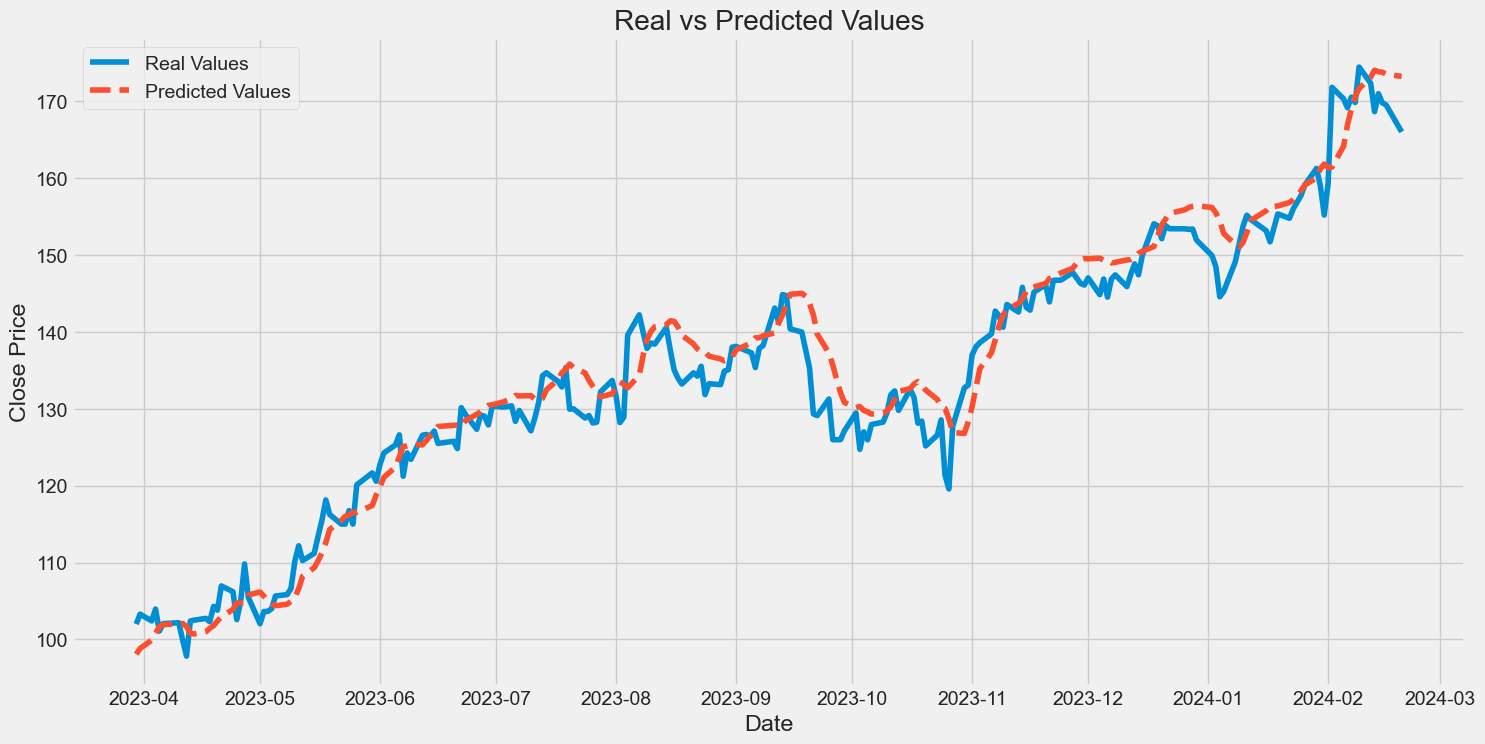

In [54]:
import matplotlib.pyplot as plt
# Assuming you have the real values in a DataFrame named 'valid' and the predicted values in a DataFrame named 'predictions'
# Plot real values and predicted values
plt.figure(figsize=(16, 8))
plt.plot( dd,y_test, label='Real Values')
plt.plot( dd,predictions, label='Predicted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()